In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
unemployment_data = pd.read_csv('MG212 - Homework 2 - Unemployment Data by State and County 2007-18 (project).csv')
unemployment_data

,State,index_code,Area_name,CLF14,EMP14,UNEMP14,URATE14,CLF15,EMP15,UNEMP15,...,CLF17,EMP17,UNEMP17,URATE17,CLF18,EMP18,UNEMP18,URATE18,MHI17,MHI%ofState17
0,US,NaN,United States,"155,957,297","146,338,305","9,618,992",6.2,"156,866,585","148,579,026","8,287,559",...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,"60,336",NaN
1,AL,0.0,Alabama,"2,160,842","2,014,290","146,552",6.8,"2,158,293","2,026,898","131,395",...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,"48,193",100.0
2,AL,1.0,"Autauga County, AL","25,592","24,097","1,495",5.8,"25,613","24,283","1,330",...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,"58,343",121.1
3,AL,2.0,"Baldwin County, AL","86,384","81,083","5,301",6.1,"87,741","82,882","4,859",...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,"56,607",117.5
4,AL,3.0,"Barbour County, AL","8,845","7,913",932,10.5,"8,613","7,848",765,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,"32,490",67.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,WY,7.0,"Fremont County, WY","20,533","19,513","1,020",5.0,"20,265","19,134","1,131",...,19347,18275,1072,5.5,"18,865","17,880",985,5.2,"50,134",81.8
361,WY,8.0,"Goshen County, WY","7,131","6,875",256,3.6,"7,086","6,851",235,...,6922,6723,199,2.9,"6,830","6,604",226,3.3,"51,023",83.3
362,WY,9.0,"Hot Springs County, WY","2,483","2,381",102,4.1,"2,402","2,301",101,...,2332,2241,91,3.9,"2,208","2,126",82,3.7,"47,775",78.0
363,WY,10.0,"Johnson County, WY","4,474","4,273",201,4.5,"4,206","3,999",207,...,4195,4020,175,4.2,"4,211","4,043",168,4.0,"55,412",90.4


In [25]:
states = unemployment_data['State'].unique()
states = states[1:34]
states

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'ID', 'IN', 'IA', 'KS', 'KY',
       'LA', 'ME', 'MA', 'MI', 'MN', 'MO', 'MT', 'NE', 'NV', 'NM', 'NC',
       'ND', 'OH', 'OK', 'OR', 'TN', 'TX', 'UT', 'VT', 'WV', 'WI', 'WY'],
      dtype=object)

In [28]:
#What factors impact the unemployment rate?
Hypothesis: Talk about the CLF, employment, unemployment, talk about which sector has the strongest relationship between the Urate and the MHI

In [26]:
#For-loop to find the correlation of coefficient for each sector
correlation_table = pd.DataFrame()
coefficients = []
for state in states: 
    one_state_urate_mhi = unemployment_data[unemployment_data['State'] == state].iloc[1:12].sort_values(by=['MHI17', 'URATE17'])
    corr_matrix = np.corrcoef(one_state_urate_mhi['URATE17'], one_state_urate_mhi['MHI17'])
    coefficients.append(corr_matrix[0][1])
coefficients
correlation_table['State'] = states
correlation_table['Coefficients'] = coefficients
print(correlation_table)

KeyError: 'MHI17'

Text(0.5, 1.0, 'Unemployment Rate vs. MHI')

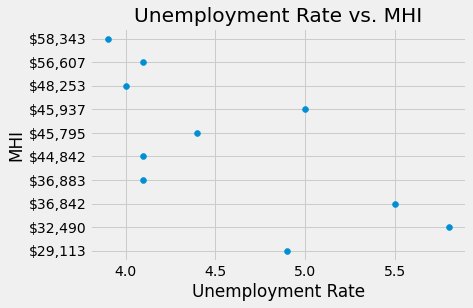

In [10]:
where_states = unemployment_data[unemployment_data['State'] == 'AL']
where_states_sorted = where_states.iloc[1:12] #Filters so that only the Alabama counties show
states_urate_mhi = where_states_sorted.sort_values(by=['MHI17', 'URATE17'])
plt.scatter(states_urate_mhi['URATE17'], states_urate_mhi['MHI17'])
plt.xlabel('Unemployment Rate')
plt.ylabel('MHI')
plt.title('Unemployment Rate vs. MHI')

In [20]:
where_states = unemployment_data[unemployment_data['State'] == 'AL']
where_states_sorted = where_states.iloc[1:12] #Filters so that only the Alabama counties show
states_urate_mhi = where_states_sorted.sort_values(by=['MHI17', 'URATE17'])
plt.hist(states_urate_mhi['URATE17'], states_urate_mhi['MHI17'])
plt.xlabel('Unemployment Rate')
plt.ylabel('MHI')
plt.title('Unemployment Rate vs. MHI')

KeyError: 'MHI17'

In [21]:
where_states = unemployment_data[unemployment_data['State'] == 'AL']
where_states_sorted = where_states.iloc[1:12] #Filters so that only the Alabama counties show
states_urate_mhi = where_states_sorted.sort_values(by=['CLF17', 'EMP17'])
plt.hist(states_urate_mhi['CLF17'], states_urate_mhi['MHI17'])
plt.xlabel('LABOR FORCE')
plt.ylabel('MHI')
plt.title('Labor Force vs. MHI')

KeyError: 'CLF17'